In [69]:
# load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv(".\Datasets\ecommerce_data.csv", encoding="UTF-8")

In [3]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [4]:
# There are 4 categories in "time_of_day" column
df["time_of_day"].value_counts()

3    140
2    127
1    120
0    113
Name: time_of_day, dtype: int64

In [5]:
# rows x columns
df.shape

(500, 6)

In [6]:
# Input and output variable
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [7]:
# shape of X
X.shape

(500, 5)

In [8]:
# Apply one hot encoding to "time_of_day" column
# 4 categories
N = X.shape[0]
D = 4

# One hot encoded columns
Z = np.zeros((N,D))
Z[np.arange(N), X[:,-1].astype(int)] = 1

# Join this Z to X
X = np.concatenate((X[:,:-1], Z), axis=1)

In [9]:
X.shape

(500, 8)

In [33]:
def update_rule(w,lr,a,y,z):
    w = w - lr*np.dot(X.T, (a-y)*sigmoid(z)*(1 - sigmoid(z)))
    return w

In [39]:
def GradientDescent(w, b, X, y, lr, iterations):
    cost = []
    
    for i in range(iterations):
        z = np.dot(X,w)+b
        a = predictions(z) 
        w = update_rule(w,lr,a,y,z)
        error = np.mean(y != a)
        cost.append(np.dot(error,error) / X.shape[0])
        
    return w, cost

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
def predictions(z):
    return np.round(z)

In [37]:
def accuracy(y, Yhat):
    return np.mean(y==Yhat)

In [65]:
w = np.random.randn(X.shape[1])
b = 0
learning_rate = 0.0001
iterations = 10000

w, cost = GradientDescent(w, b, X, y, learning_rate, iterations)

In [66]:
Yhat = predictions(np.dot(X,w)+b)
accuracy(y, Yhat)

0.718

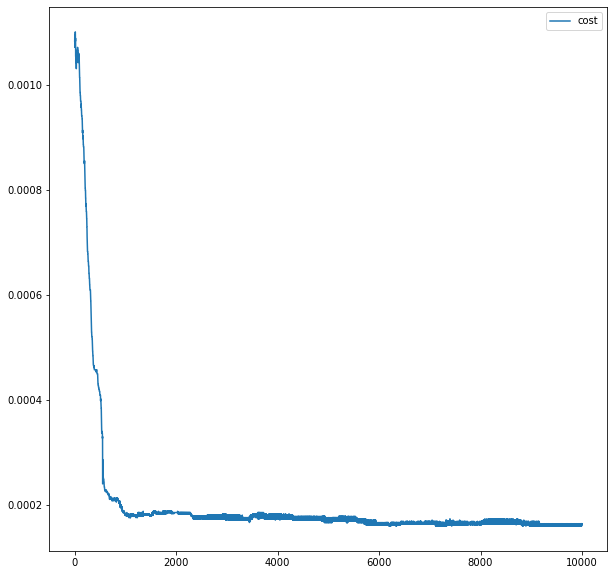

In [71]:
plt.figure(figsize=(10,10))
plt.plot(cost, label="cost")
plt.legend()
plt.show()